In [22]:
# Student ID: 1009645706
# Student name: Devin de Silva
# Instructor: Dr. Shion Guha
# Course code: INF2178
# Program: MI
# Faculty of Information
# University of Toronto
# Assignment 4
# Date: April 5, 2024

In [23]:
import pandas as pd

df = pd.read_csv("/content/INF2178_A4_data.csv")
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [24]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import mixedlm
from statsmodels.stats.power import TTestIndPower
%pip install bioinfokit
from bioinfokit.analys import stat

In [25]:
# General information about the data
df.info()

# Confirming that there's no more null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [26]:
# Dropping null values
df = df.dropna()
df.isnull().sum()

Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [27]:
# General Statistical information, for an overview of the dataset
df1 = df.describe()
df1.round(2)

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,279.00,279.00,279.00,279.00,279.00,279.00,279.00,279.00,279.00,279.00,279.00
mean,189.01,1.49,353.20,76.39,14.68,2.49,27.32,0.28,1479.43,0.73,1.20
std,105.13,0.50,404.53,7.78,2.90,1.13,3.44,0.38,176.75,0.04,0.14
min,0.00,1.00,0.00,60.00,6.00,1.00,15.00,0.00,1106.00,0.65,0.88
25%,97.50,1.00,0.00,71.00,12.00,2.00,26.00,0.00,1348.50,0.70,1.12
50%,193.00,1.00,0.00,76.00,15.00,2.00,29.00,0.00,1461.00,0.73,1.20
75%,280.50,2.00,673.00,82.00,16.50,3.00,30.00,0.50,1568.50,0.76,1.30
max,371.00,2.00,1707.00,98.00,23.00,5.00,30.00,2.00,2004.00,0.84,1.59


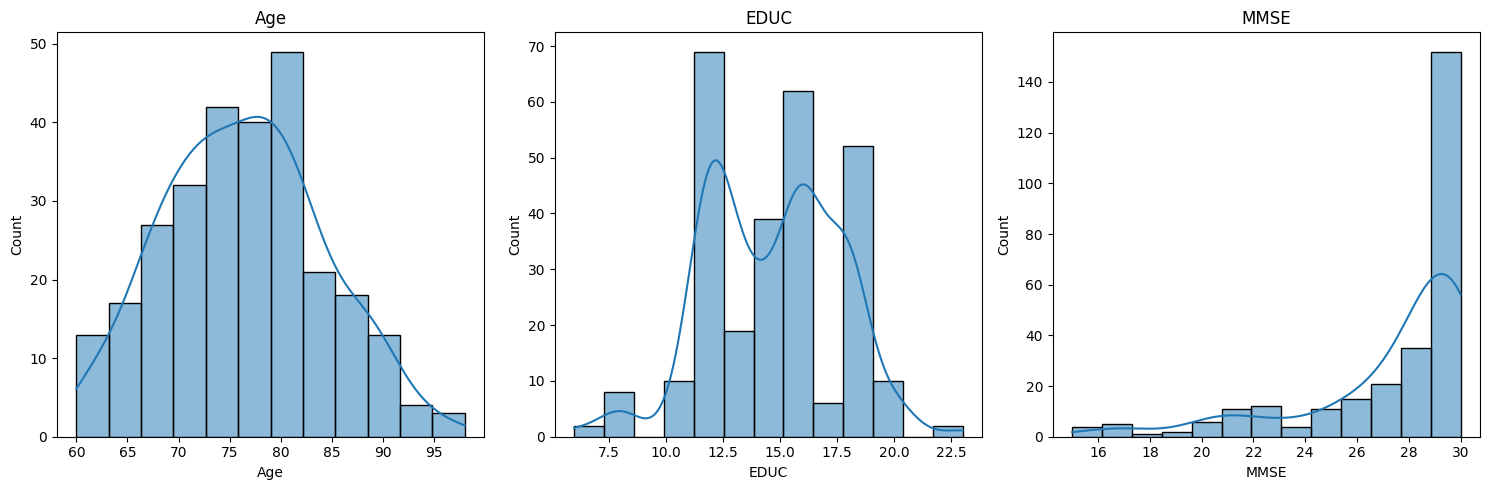

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for Age
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age')

# Histogram for Educational Levels
sns.histplot(df['EDUC'], kde=True, ax=axes[1])
axes[1].set_title('EDUC')

# Histogram for MMSE scores
sns.histplot(df['MMSE'], kde=True, ax=axes[2])
axes[2].set_title('MMSE')

plt.tight_layout()
plt.show()

# We can see that, except for age, which seems roughly normally distributed, the other two quite skewed

**Question 1: Cognitive decline (MMSE Scores) over time, comparing groups with and without dementia**

Group as the fixed effect and Subject ID as the random effect.


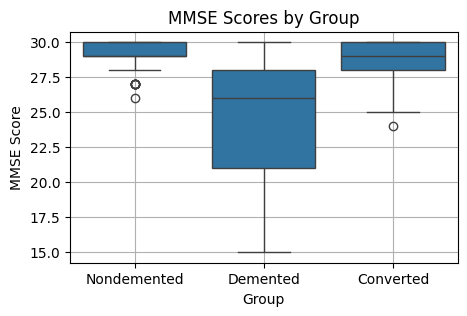

In [29]:
# Boxplot for MMSE scores by Group

plt.figure(figsize=(5, 3))
sns.boxplot(x='Group', y='MMSE', data=df)
plt.title('MMSE Scores by Group')
plt.xlabel('Group')
plt.ylabel('MMSE Score')
plt.grid(True)
mmse_plot = plt.gca()
plt.show()

# The spread of the data for demented group, including median and quartiles, is markedly larger

In [30]:
# Mixed effects ANOVA Analysis 1
# For this analysis, we use a model that uses Group as the fixed effect and Subject ID as the random effect.
model_1 = mixedlm("MMSE ~ Group", data=df, groups=df["Subject ID"], re_formula="1").fit()
model_1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM   Dependent Variable:   MMSE     
No. Observations:     279       Method:               REML     
No. Groups:           142       Scale:                2.6320   
Min. group size:      1         Log-Likelihood:       -633.3967
Max. group size:      2         Converged:            Yes      
Mean group size:      2.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            28.766    0.652 44.141 0.000 27.489 30.044
Group[T.Demented]    -4.102    0.727 -5.643 0.000 -5.527 -2.677
Group[T.Nondemented]  0.392    0.711  0.551 0.582 -1.002  1.785
Group Var             4.472    0.608                           
===============================================================

"""

**Question 2: Impact of education on rate of cognitive decline (in terms of MMSE Scores) in patients with dementia**

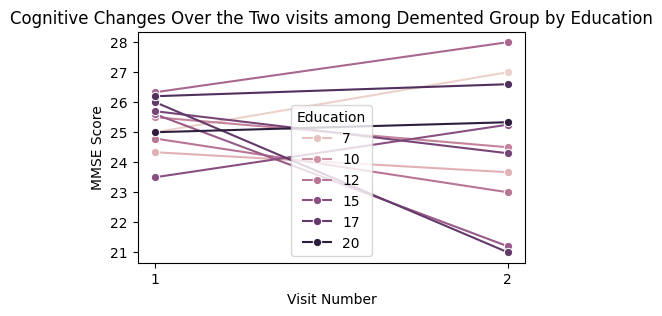

In [31]:
# Chart showing the cognitive decline of two visits, among demented group, in turn grouped by education
demented = df[df['Group'] == 'Demented']

plt.figure(figsize=(5, 3))
sns.lineplot(x='Visit', y='MMSE', hue='EDUC', data=demented, marker='o', errorbar=None)
plt.title('Cognitive Changes Over the Two visits among Demented Group by Education')
plt.xlabel('Visit Number')
plt.xticks([1, 2])
plt.ylabel('MMSE Score')
plt.legend(title='Education')
plt.show()

In [32]:
demented = df[df['Group'] == 'Demented']
# Mixed effects ANOVA Analysis #2
# For this analysis, we use a model that uses Education as the fixed effect and Subject ID of demented patients as the random effect.
model_2 = mixedlm("MMSE ~ EDUC", data=demented, groups=demented["Subject ID"], re_formula="1").fit()
model_2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: MMSE     
No. Observations: 111     Method:             REML     
No. Groups:       56      Scale:              5.2047   
Min. group size:  1       Log-Likelihood:     -294.9405
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
              Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     22.969    2.328 9.868 0.000 18.407 27.532
EDUC           0.122    0.164 0.746 0.456 -0.199  0.444
Group Var     11.082    1.631                          
=======================================================

"""

**Question 3: Relationship between Socioeconomic status and MMSE Scores in nondemented group over time**

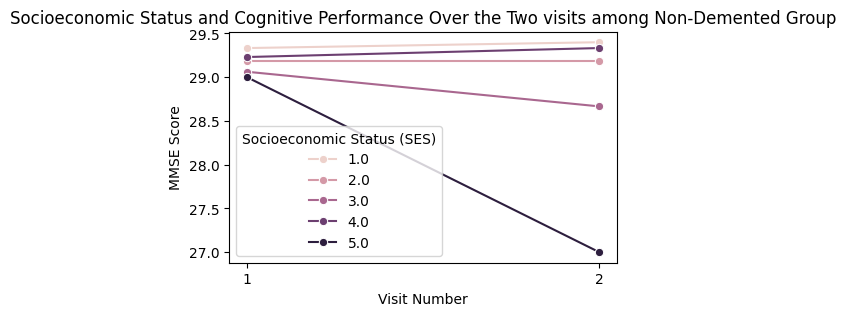

In [33]:
# A line chart showing Socioeconomic Status and MMSE Scores Over the Two visits among Non-Demented Group
nondemented = df[df['Group'] == 'Nondemented']

plt.figure(figsize=(5,3))
sns.lineplot(x='Visit', y='MMSE', hue='SES', data=nondemented, marker='o', errorbar=None)
plt.title('Socioeconomic Status and Cognitive Performance Over the Two visits among Non-Demented Group')
plt.xlabel('Visit Number')
plt.xticks([1, 2])
plt.ylabel('MMSE Score')
plt.legend(title='Socioeconomic Status (SES)')
plt.show()

In [34]:
# Mixed effects ANOVA Analysis #3
# For this analysis, we use a model that uses Socioeconomic status as the fixed effect and Subject ID of nondemented patients as the random effect.
model_3 = mixedlm("MMSE ~ SES", data=nondemented, groups=nondemented["Subject ID"], re_formula="1").fit()
model_3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: MMSE     
No. Observations: 142     Method:             REML     
No. Groups:       72      Scale:              0.5765   
Min. group size:  1       Log-Likelihood:     -185.6176
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   29.393    0.214 137.343 0.000 28.974 29.813
SES         -0.099    0.082  -1.209 0.227 -0.258  0.061
Group Var    0.233    0.165                            
=======================================================

"""

**Assumption Checks**

In [35]:
# Create function for Normality of Residuals

def test_normality(model, title):
    residuals = model.resid
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram of residuals
    ax[0].hist(residuals, bins=20, alpha=0.7)
    ax[0].set_title('Histogram of Residuals')
    ax[0].set_xlabel('Residuals')
    ax[0].set_ylabel('Frequency')

    # Q-Q plot to show linear regression
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title('Q-Q Plot of Residuals')
    plt.suptitle(title)

    # Shapiro-Wilk test
    shapiro_test = stats.shapiro(residuals)
    plt.show()

    return shapiro_test

In [36]:
# Create function to check for homogeneity of variances
def test_homogeneity(model, data, group_var):
    groups = data[group_var].unique()
    residuals = model.resid
    residuals_by_group = [residuals[data[group_var] == g] for g in groups]

    # Levene test
    levene_test = stats.levene(*residuals_by_group)

    return levene_test

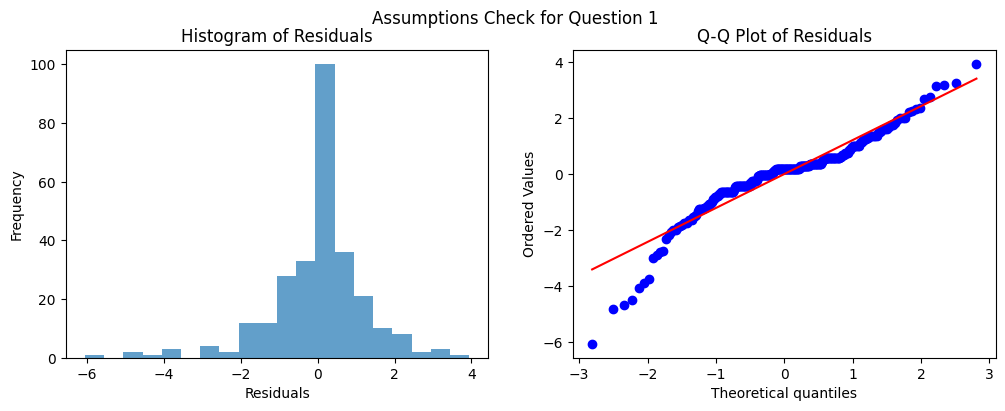

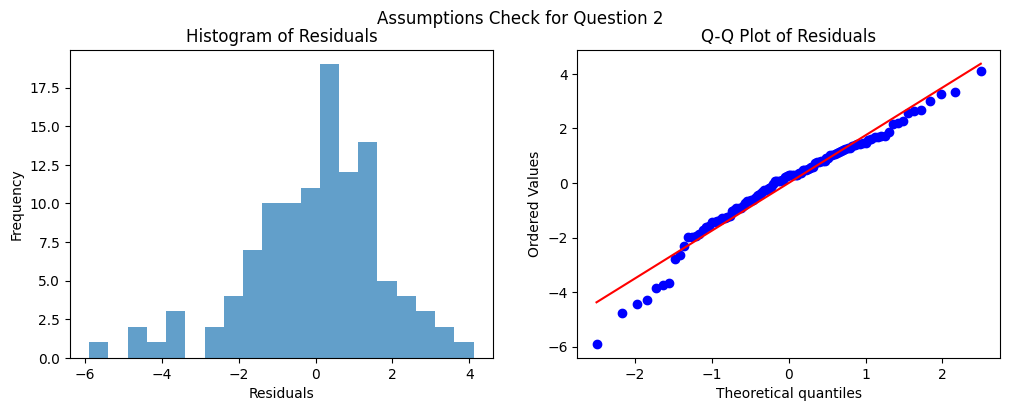

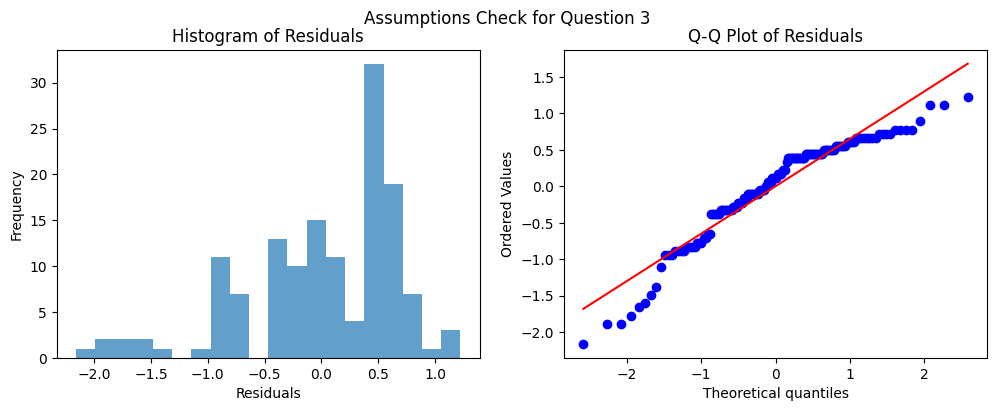

(ShapiroResult(statistic=0.909995436668396, pvalue=6.964728706954082e-12),
 ShapiroResult(statistic=0.96473628282547, pvalue=0.004950528033077717),
 ShapiroResult(statistic=0.9258349537849426, pvalue=9.40115228331706e-07),
 LeveneResult(statistic=36.20741822832716, pvalue=1.0867183004350899e-14),
 LeveneResult(statistic=1.3626566242277411, pvalue=0.2086815949266222),
 LeveneResult(statistic=1.0397293995693886, pvalue=0.38912208771953904))

In [37]:
# Checking assumptions for each model
shapiro_1 = test_normality(model_1, 'Assumptions Check for Question 1')
levene_1 = test_homogeneity(model_1, df, 'Group')

shapiro_2 = test_normality(model_2, 'Assumptions Check for Question 2')
levene_2 = test_homogeneity(model_2, demented, 'EDUC')

shapiro_3 = test_normality(model_3, 'Assumptions Check for Question 3')
levene_3 = test_homogeneity(model_3, nondemented, 'SES')

(shapiro_1, shapiro_2, shapiro_3, levene_1, levene_2, levene_3)

In [38]:
# Statistical Power Analysis

effect_size = 0.7
alpha = 0.05
power = 0.91

analysis = TTestIndPower()
analysis

Sample size is: 45.45073088568012


<Figure size 640x480 with 0 Axes>

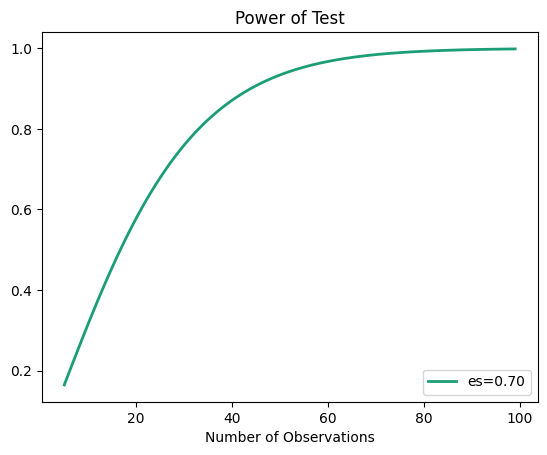

In [40]:
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print('Sample size is:', sample_size)
fig = plt.figure()
analysis.plot_power(dep_var='nobs', nobs=np.arange(5, 100), effect_size=np.array([effect_size]))
plt.show()